# resistivité du fil métallique


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display


## 1. Données expérimentales

In [27]:
#dimensions de l'échantillon
S = np.pi*((0.00017/2.0)**2) #[m^2]
L_HT = 0.05                #[m]
L_BT = 0.08                #[m]

#mesures jusqu'à 600 °C
U1 = [0.524, 2.247,4.150 ,4.848  ]
U2= [0.607, 2.191,4.175,4.930 ]

HTsamp = len(U1)
U_HT = np.zeros(4)
for i in range(HTsamp):
    U_HT[i] = (U1[i]+U2[i])/2

I_HT = [0.1,  0.5   ,1     ,1.2]
T= [30,  100   ,195  ,320 ]

#mesures à 'basse' température
I_BT = [0.08,0.15,0.21 ,0.25,0.29,0.34,0.40,0.45,0.49, 0.55,0.60,0.65,0.70,0.75 ]
U_BT = [0.453,0.764,1.1,1.3,1.47,1.76,2.02, 2.32, 2.52,2.78,3.02,3.26,3.58,3.78 ]

BTsamp = len(I_BT)


## 2. $V = RI$ Régression linéaire

In [28]:
def compute_resistance(U, I):
    
    U = np.array(U) ; I = np.array(I)

    # Reshape I for sklearn LinearRegression
    I_reshaped = I.reshape(-1, 1)

    model = LinearRegression() ; model.fit(I_reshaped, U)
    U_pred = model.predict(I_reshaped)

    R = model.coef_[0] ; mse = mean_squared_error(U, U_pred)

    return U_pred, R, mse

UBT_pred, RBT,MSEBT = compute_resistance(U_BT, I_BT)
UHT_pred, RHT,MSEHT = compute_resistance(U_HT, I_HT)
rho_BT = RBT * S / L_BT
rho_HT = RHT * S / L_HT

RES = np.array([[rho_BT*1e06,RBT,MSEBT],[rho_HT*1e06,RHT,MSEHT]])
columns = ["Resistivity (ρ) [μΩ·m]", "Resistance (R) [Ω]", "MSE [V²]"]
index = ["Low Temperature (BT)", "High Temperature (HT)"]
RES_df = pd.DataFrame(RES, columns=columns, index=index)
display(RES_df)


,Resistivity (ρ) [μΩ·m],Resistance (R) [Ω],MSE [V²]
Low Temperature (BT),1.418265,4.998731,0.000509
High Temperature (HT),1.785260,3.932635,0.001299


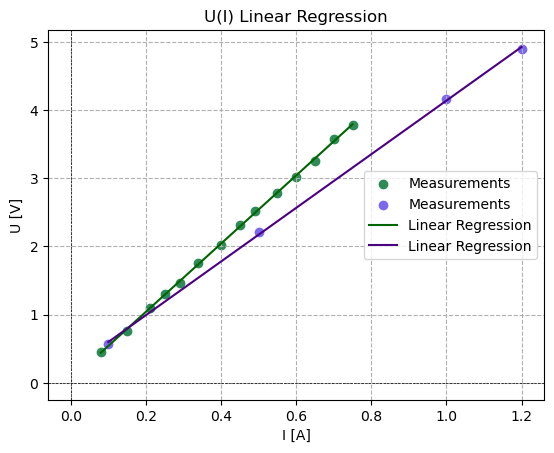

In [29]:
plt.scatter(I_BT, U_BT, color='seagreen', label='Measurements')
plt.scatter(I_HT, U_HT, color='mediumslateblue', label='Measurements')

plt.plot(I_BT, UBT_pred, color='darkgreen', label='Linear Regression')
plt.plot(I_HT, UHT_pred, color='indigo', label='Linear Regression')

plt.xlabel('I [A]')
plt.ylabel('U [V]')
plt.title('U(I) Linear Regression')
plt.legend()
plt.axhline(0, color='black',linestyle='dashed' , lw=0.5)
plt.axvline(0, color='black',linestyle='dashed', lw=0.5)
plt.grid(True, linestyle='dashed')
plt.show()

## 3. $\rho (T)$ régression linéaire

In [30]:
rho_BT_list = np.zeros(BTsamp)
rho_HT_list = np.zeros(HTsamp)

for i in range(BTsamp):
    rho_BT_list[i] = (U_BT[i]/I_BT[i]) * S / L_BT
for i in range(HTsamp):
    rho_HT_list[i] = (U_HT[i]/I_HT[i]) * S / L_HT
print(rho_HT_list)

def compute_drhodT(rho, T):
    rho = np.array(rho) ; T = np.array(T)

    # Reshape I for sklearn LinearRegression
    T_reshaped = T.reshape(-1, 1)

    model = LinearRegression() ; model.fit(T_reshaped, rho)
    rho_pred = model.predict(T_reshaped)

    drhodT = model.coef_[0] ; mse = mean_squared_error(rho, rho_pred)

  
    return rho_pred, drhodT, mse,model

rho_HT_pred, drhodT_HT, MSEHT,model = compute_drhodT(rho_HT_list, T)

print(rho_BT_list)


[2.56714458e-06 2.01467509e-06 1.88960908e-06 1.84950926e-06]
[1.60659330e-06 1.44510644e-06 1.48617902e-06 1.47537045e-06
 1.43819268e-06 1.46869457e-06 1.43281169e-06 1.46276045e-06
 1.45915759e-06 1.43410135e-06 1.42808294e-06 1.42299043e-06
 1.45105116e-06 1.42997444e-06]


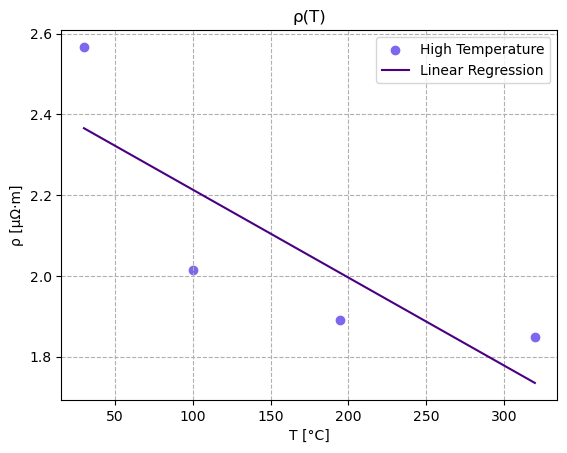

In [31]:
plt.scatter(T, rho_HT_list*1e06, color='mediumslateblue', label='High Temperature')
plt.plot(T, rho_HT_pred*1e06, color='indigo', label='Linear Regression')

plt.xlabel('T [°C]')
plt.ylabel('ρ [μΩ·m]')
plt.title('ρ(T)')
plt.legend()
plt.grid(True, linestyle='dashed')
plt.show()

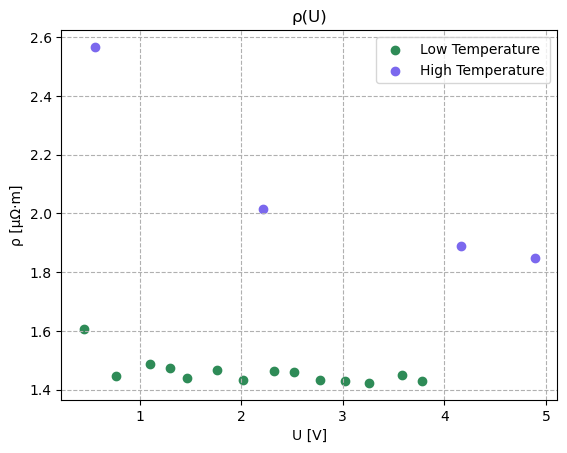

In [ ]:
plt.scatter(U_BT,rho_BT_list*1e06, color='seagreen', label='Second experiment')
plt.scatter(U_HT,rho_HT_list*1e06, color='mediumslateblue', label='First experiment')

plt.xlabel('U [V]')
plt.ylabel('ρ [μΩ·m]')  
plt.title('ρ(U)')
plt.legend()
plt.grid(True, linestyle='dashed')
plt.show()